In [1]:
import locale

def getpreferredencoding(do_setlocale = True):
    return "UTF-8"

locale.getpreferredencoding = getpreferredencoding

In [ ]:
#!pip install "scikit-learn>=0.22.2.post1,<1.0.2"
#!pip install scikit-learn==1.2.2

!pip install bertopic

In [4]:
!pip uninstall scikit-learn -y
!pip install scikit-learn==1.2.2


Found existing installation: scikit-learn 0.24.2
Uninstalling scikit-learn-0.24.2:
  Successfully uninstalled scikit-learn-0.24.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 51.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
octis 1.11.1 requires scikit-learn==0.24.2, but you have scikit-learn 1.2.2 which is incompatible.


In [6]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import torch

In [74]:
list_text = []
list_dates = []

with open('/content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere/data/txt/incels_redpill_reduced_data.txt', 'r') as f:
    for lines in f.readlines():
        list_text.append(lines.strip())

with open('/content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere/data/txt/incels_redpill_reduced_dates.txt', 'r') as f:
    for lines in f.readlines():
        list_dates.append(lines.strip())

#1. Model Training

In [ ]:
import pandas as pd
df = pd.DataFrame(list(zip(list_text, ['train' for i in list_text])), columns=["text", 'label'])
df.to_csv('/content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere/data/txt/incels_redpill_reduced_data.tsv', sep = "\t")

## 1. Non-octis

In [ ]:
import torch

# BERTopic v1

sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
sentence_model.to(torch.device('cuda'))

topic_model = BERTopic(verbose=True, 
                       top_n_words=25,
                       min_topic_size=500,
                       embedding_model=sentence_model)

topics, probs = topic_model.fit_transform(list_text)

topic_model.save('/content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere/BERTopic/BERTopic_model_params_mts_500_retrained')

Batches:   0%|          | 0/37915 [00:00<?, ?it/s]

2023-03-30 11:57:52,336 - BERTopic - Transformed documents to Embeddings
2023-03-30 12:18:06,075 - BERTopic - Reduced dimensionality
2023-03-30 12:29:21,417 - BERTopic - Clustered reduced embeddings
/usr/local/lib/python3.9/dist-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


## 2. Octis

In [ ]:
from octis.dataset.dataset import Dataset
import os
import string
from octis.preprocessing.preprocessing import Preprocessing

dataset = Dataset()
dataset.load_custom_dataset_from_folder('/content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere/data/octis_data/')

In [ ]:
params = {
    "nr_topics": "auto",
    "min_topic_size": [30, 60, 100, 120, 150, 200],
    "verbose": True
}

In [ ]:
import torch
# BERTopic v2: cluster size --> min_topic_size: int = 10,

sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
sentence_model.to(torch.device('cuda'))

topic_model = BERTopic(verbose=True, embedding_model=sentence_model,
                       top_n_words=25, 
                       min_topic_size = 100)

topics, probs = topic_model.fit_transform(list_text)

topic_model.save('/content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere/BERTopic_model_params_mts_100')

Batches:   0%|          | 0/37915 [00:00<?, ?it/s]

2023-03-24 16:25:40,136 - BERTopic - Transformed documents to Embeddings
2023-03-24 16:46:43,576 - BERTopic - Reduced dimensionality
2023-03-24 16:52:03,908 - BERTopic - Clustered reduced embeddings
/usr/local/lib/python3.9/dist-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [ ]:
from google.colab import runtime

runtime.unassign()

In [ ]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

list_text_first_month = []

with open('/content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere/data/txt/incels_redpill_first_month_data.txt', 'r') as f:
    for lines in f.readlines():
        list_text_first_month.append(lines.strip())

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(list_text_first_month)

with open('/content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere/data/octis_data/incels_redpill_first_month_data_vocab.txt', 'w') as f:
    for words in vectorizer.get_feature_names_out():
        f.write("%s\n" % words)

# 2. Model exploration

## 1. Messing around

In [ ]:
topic_model.c_tf_idf_.shape

(236, 485187)

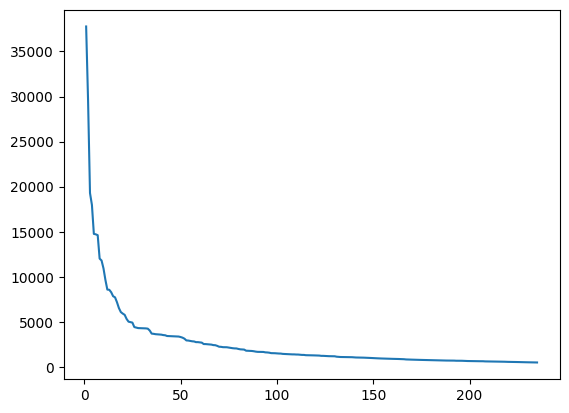

In [ ]:
import matplotlib.pyplot as plt
plt.plot(topic_model.get_topic_info()[1:]['Count'])
#plt.xlim([0, 100])

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,602583,-1_to_you_the_and
1,0,37767,0_chad_chads_they_he
2,1,29558,1_ugly_looks_attractive_personality
3,2,19292,2_height_short_tall_taller
4,3,17974,3_white_asian_black_race
...,...,...,...
231,230,513,230_whale_whales_land_fat
232,231,513,231_vitamin_iu_d3_vit
233,232,506,232_bbc_bbcs_white_black
234,233,504,233_satire_satirical_this_serious


In [ ]:
#topic_model_3_gram = topic_model.update_topics(list_text, n_gram_range=(1, 3))

In [ ]:
topic_model.c_tf_idf_.shape

(857, 212024)

In [ ]:
topic_model.find_topics(['rational', 'logical', 'rationality', 'logic',
                         'unemotional', 'masculinity', 'never sad', 'not emotional',
                         'instincts', 'science', 'scientific', 'men'])

([824, 665, 578, 405, 100],
 [0.8268938685896484,
  0.6882328959023211,
  0.6405025860438696,
  0.5477051727345164,
  0.5137343235479803])

In [ ]:
topic_model.find_topics(['giving up', 'commit suicide', 'blackpill', 'committing suicide', 'depression', 'depressed', 'rot in bed', 'rotting in bed', 'rope myself', 'I want to die'], 10)

Exception: ignored

In [ ]:
topic_model.find_topics(['men', 'man'], 10)

([330, 557, 68, 722, 819, 38, 574, 196, 533, 244],
 [0.5568572855662888,
  0.5406386077987035,
  0.5341004938090075,
  0.531149378944961,
  0.520758636358857,
  0.5146236790987616,
  0.5068309165793619,
  0.5034526870726206,
  0.5010723878876879,
  0.49805668353300847])

In [ ]:
topic_model.get_topic(0)


[('chad', 0.038114134439998525),
 ('chads', 0.019352321231316763),
 ('they', 0.0049581764461959455),
 ('he', 0.0046758698974993405),
 ('women', 0.004404729473549765),
 ('are', 0.004028313009852683),
 ('and', 0.0040233768231656706),
 ('all', 0.003977117958388991),
 ('she', 0.003975636144763952),
 ('only', 0.0039372787354511095),
 ('with', 0.00392423054360017),
 ('him', 0.0038697198869756945),
 ('get', 0.0037324505587297886),
 ('is', 0.003656420023991322),
 ('be', 0.0036217887958135938),
 ('females', 0.0036138241358175532),
 ('to', 0.0036116484460283127),
 ('who', 0.003603283813628908),
 ('for', 0.0035850847787373507),
 ('would', 0.0035802732687448663),
 ('like', 0.0035792477420891985),
 ('the', 0.003568842825178364),
 ('her', 0.0035491963761925894),
 ('not', 0.003514262624716908),
 ('his', 0.0034974754309794747)]

In [ ]:
fig = topic_model.visualize_topics()
#fig.write_html('/content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere/hierarchy.html')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

## 2. Metrics


### 2.0 Imports

In [ ]:
import sklearn
sklearn.__version__

'0.24.2'

In [7]:
from bertopic import BERTopic
import sklearn.metrics._dist_metrics

topic_model = BERTopic.load('/content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere/BERTopic/BERTopic_model_params_mts_500_retrained')

In [83]:
topic_model.c_tf_idf_.shape

(239, 212024)

In [84]:
topic_model.reduce_topics(list_text, nr_topics=400)

### 2.1 Theme Confirmation


In [66]:
import pandas as pd
import warnings

In [75]:
# list of keywords associated to gender, themselves, and themes

m_gendered = ['masculinity', 'masculine', 'man', 'men', 'males', 'guy', 'guys', 'dudes', 'boy', 'boys', 'he', 'him']
f_gendered = ['femininity', 'feminine', 'woman', 'women', 'females', 'female', 'she', 'girls', 'girl', 'foids']
incels = ['incels', 'truecels', 'us', 'ourselves', 'ourself', 'myself', 'me', 'I']

# themes

t11 = ['violence', 'violence against', 'to kill all', 
                'to hurt all', 'kill them', 'hurt them',
                'revenge', 'rape', 'sexual assault']
t10 = ['giving up', 'to commit suicide', 'getting blackpilled', 'blackpilled' 
                'commit suicide', 'depression', 'depressed', 
                'rot in bed', 'rotting in bed', 'rope myself', 
                'I want to die.', 'kill myself', 'death', 'to die']
t9 = ['I self-improvement', 'I become more physically attractive',
                       'to better myself', 'body modification myself', 'invest in positive outlets',
                       'getter better', 'better version of myself']
t8 = ['genetic disadvantage', 'incel', 'Incel', 'incels', 'undesireable',
                 'unattractive', 'ugly', 'discrimination', 'living as an incel']
t7 = ['Beta', 'beta', 'betas', 'Betas', 'weak', 'emotional',
                 'trade financial security for sex',
                 'financial security in exchange for a relationship that includes sexual intimacy']
t6 = ['sexually successful', 'alpha', 'chad', 'Alphas', 'Chads', 'Alpha', 'Chad',
                 'successful', 'socially desireable traits']
t5 = ['inherently seek power through their sexuality', 'only power is their sexuality',
                 'trading sex for power', 'seek power in echange for sex', 'exchange power for sex']

t4 = ['promiscuous', 'primary motivation is promiscuity', 'need to find the most (evolutionarily) fit mate',
                  'are biologically designed to want sex', 'promiscuityas an opportunity for sexual domination']
t3 = ['inherently deceptive', 'deceitfulness is a means of manipulating', 'will falsely indicate sexual interest',
                'because they are deceiving, no accusation of rape is believable']
t2 = ['biological essentialism', 'immutable biological differences as the cause of differences in behavior',
                'gendered behaviors as genetic, biological, or having evolved', 
                'evolutionary psychology explains gendered behaviors', 'are naturally predisposed']
t1 = ['Gender essentialism', 'people of the same gender share a deep, underlying essence',
                   'completely distinct attributes', 'scientific', 'neurologically']

In [85]:
import numpy as np

# function definition
def theme_confirmation(g_keywords: list, theme_keywords:list, topic_model):
    idx, p = topic_model.find_topics(theme_keywords, 10)
    #print(idx)
    
    # get topic stability: maybe later

    # get the words and probs
    topics = [[word for (word, weight) in topic_model.get_topic(i)] for i in idx] #10 * 25 dimensions
    weights = [[weight for (word, weight) in topic_model.get_topic(i)] for i in idx] #10 * 25
    topic_weight = [[(word, weight) for (word, weight) in topic_model.get_topic(i)] for i in idx] # 2 * 10 * 25

    # get the gender term as (word, weight)
    g_matrix = []
    w_matrix = []
    w_weighted_matrix = []
    rank = []
    for count, value in enumerate(topic_weight):
        words = topics[count]
        word_weight_list = [i for i in value if i[0] in g_keywords]
        word_list = [i[0] for i in word_weight_list]
        
        # here can add multiplation using the count to get the probability and multiplying where u need

        weight_list = [i[1] for i in word_weight_list]
        weight_list_weighted = [(1 + p[count]) * i[1] for i in word_weight_list]
        word_rank = [c for c, i in enumerate(value) if i[0] in g_keywords]

        g_matrix.append(word_list)
        w_matrix.append(weight_list)
        w_weighted_matrix.append(weight_list_weighted)
        rank.append(word_rank)
    
    #print(g_matrix)
    
    indexes = [idx[c] for c, i in enumerate(g_matrix) if i != []]
    w_matrix_cleaned = []
    g_matrix_cleaned = []
    w_weighted_matrix_cleaned = []
    rank_matrix_cleaned = []
    for w1, g1, ww1, r1 in zip(w_matrix, g_matrix, w_weighted_matrix, rank):
        for w2, g2, ww2, r2 in zip(w1, g1, ww1, r1):
            w_matrix_cleaned.append(w2)
            g_matrix_cleaned.append(g2)
            w_weighted_matrix_cleaned.append(ww2)
            rank_matrix_cleaned.append(r2)

    score = np.array(w_matrix_cleaned)
    output_dict = {
        'average_words' : np.array([np.array(i).mean() for i in weights]).mean(),
        'avg_std_words' : np.array([np.array(i).std() for i in weights]).mean(),
        'average_topics' : np.array(p).mean(),
        'std_topics' : np.array(p).std(),
        'words' : g_matrix_cleaned,
        'score' : score,
        'score_avg' : score.mean(),
        'weighted' : w_weighted_matrix_cleaned,
        'weighted_avg' : np.array(w_weighted_matrix_cleaned).mean(),
        'rank' : rank_matrix_cleaned,
        'average_rank' : np.array(rank_matrix_cleaned).mean(),
        'std_rank' : np.array(rank_matrix_cleaned).std(),
        'topics': indexes,
        'total' : len(indexes)
    }
    return output_dict

df_men = {
    'average_words' : [],
    'avg_std_words' : [],
    'average_topics' : [],
    'std_topics' : [],
    'score_avg' : [],
    'weighted_avg' : [],
    'average_rank' : [],
    'std_rank' : [],
    'total' : []
}

df_women = {
    'average_words' : [],
    'avg_std_words' : [],
    'average_topics' : [],
    'std_topics' : [],
    'score_avg' : [],
    'weighted_avg' : [],
    'average_rank' : [],
    'std_rank' : [],
    'total' : []
}
df_incel = {
    'average_words' : [],
    'avg_std_words' : [],
    'average_topics' : [],
    'std_topics' : [],
    'score_avg' : [],
    'weighted_avg' : [],
    'average_rank' : [],
    'std_rank' : [],
    'total' : []
}

for name, array in [('male', m_gendered), ('female', f_gendered), ('incels', incels)]:
    for i in [t1, t2, t3, t4, t5, t6, t7, t8, t9, t10, t11]: 
        if name == 'male':
            df = df_men
        elif name == 'female':
            df = df_women
        else:
            df = df_incel
        
        d = theme_confirmation(array, i, topic_model)
        for k, v in df.items():
            v.append(d[k])


<ipython-input-85-febc05ac36eb>:58: RuntimeWarning: Mean of empty slice.
  'score_avg' : score.mean(),
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-85-febc05ac36eb>:60: RuntimeWarning: Mean of empty slice.
  'weighted_avg' : np.array(w_weighted_matrix_cleaned).mean(),
<ipython-input-85-febc05ac36eb>:62: RuntimeWarning: Mean of empty slice.
  'average_rank' : np.array(rank_matrix_cleaned).mean(),
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid val

In [86]:
df_men = pd.DataFrame(df_men)

# save the dataset
#df_men.to_csv('/content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere/BERTopic/Results/df_men_gendered_association.csv')
print(df_men.shape)
df_men

(11, 9)


,average_words,avg_std_words,average_topics,std_topics,score_avg,weighted_avg,average_rank,std_rank,total
0,0.008866,0.011760,0.330147,0.046485,0.014222,0.019324,7.300000,4.583667,7
1,0.009610,0.012279,0.300355,0.049522,NaN,NaN,NaN,NaN,0
2,0.009972,0.012565,0.316968,0.038660,0.005478,0.007077,12.500000,6.020797,3
3,0.011652,0.012240,0.400829,0.026676,0.012373,0.017147,12.000000,6.683313,3
4,0.009665,0.012215,0.388728,0.027879,0.013598,0.018703,8.545455,5.773980,7
5,0.012283,0.009279,0.484677,0.036935,0.010034,0.014908,13.333333,6.823163,4
6,0.017829,0.016974,0.511984,0.086821,0.004313,0.007613,9.500000,5.500000,1
7,0.009553,0.012589,0.355252,0.070361,0.019224,0.024854,9.666667,7.738791,3
8,0.008443,0.009417,0.407735,0.035374,0.005073,0.007235,10.000000,1.000000,1
9,0.009216,0.010642,0.419897,0.095812,0.010687,0.016982,3.000000,0.000000,1


In [87]:
df_women = pd.DataFrame(df_women)
# save the dataset
df_women.to_csv('/content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere/BERTopic/Results/df_women_gendered_association.csv')
#print(df_women.shape)
df_women

,average_words,avg_std_words,average_topics,std_topics,score_avg,weighted_avg,average_rank,std_rank,total
0,0.008866,0.011760,0.330147,0.046485,0.006434,0.008629,9.375000,7.287618,6
1,0.009610,0.012279,0.300355,0.049522,NaN,NaN,NaN,NaN,0
2,0.009972,0.012565,0.316968,0.038660,0.006847,0.008838,10.375000,8.092242,3
3,0.011652,0.012240,0.400829,0.026676,0.004857,0.006830,12.714286,6.474440,3
4,0.009665,0.012215,0.388728,0.027879,0.006220,0.008588,11.166667,7.613949,6
5,0.012283,0.009279,0.484677,0.036935,0.005129,0.007578,12.875000,4.807221,5
6,0.017829,0.016974,0.511984,0.086821,0.006344,0.009543,12.100000,6.410148,4
7,0.009553,0.012589,0.355252,0.070361,0.007246,0.009844,7.125000,5.622222,3
8,0.008443,0.009417,0.407735,0.035374,0.008102,0.011259,9.000000,6.271629,4
9,0.009216,0.010642,0.419897,0.095812,0.005785,0.008896,14.000000,6.683313,2


### 2.2 Document discovery

In [114]:
t1 = ['Women appear to be master manipulators because their biology allows them to hold multiple contradictory beliefs at the same time - that she loves Billy and wants to get fucked by Chad. In fact not only does their biology allow for this, but it is actually the lynchpin of female sexual strategy. The fact that these beliefs are sincerely held is what makes them so effective. Humans are evolved to have a sixth sense for when we are being lied to by someone we know well. Female cognitive dissonance evolved to defeat the human brain\'s lie detecting ability.',
      'Neurologically, the famale brain hasn\'t changed much since the caveman era. They still desire whatever what was the best genetic fit for them back in the day.']
t2 = ['Your male genes are programed to want women just for sex cause your male superiority doesn\'t need anything better from them.', 
      'We are, indeed, no longer in hunter-gatherer times. However, much of what was at play then still applies today. This includes women of course desiring bigger and more physically intimidating men, among many other things. It\'s all evolutionary behavior bro.']
t3 = ['Yeah man all women are going to lie about that. It\'s in their nature to deceive sexually, whether it\'s lying about their past exploits and N counts [number of sexual partners], or tricking people into pregnancy or cheating and using sex in a relationship to manipulate behaviors.',
      'There is no bigger liar than the female human. All the rising false rape charges essentially prove this. All the false hope they give toward sub8 men also proves this fact.']
t4 = ['Women can\'t handle freedom to a point where if you leave them to their own devices they will fuck around like crazy. And science has proved it many times over but people just ignore it.',
      'That\'s the current state of females fellas. They are nothing but whores and parasites seeking to get fucked by as many Chads as possible.',
      'yup.. genetics are the only thing that matter. femoids can give typical blue pilled response but once my aunt saw the hunter eyes and superior frame of the chad she immediately got wet like a dog in heat…. femoids can\'t fight biological ticks']
t5 = ['Our gynocentric society is full of propaganda that says men should chase women, that women are the prize, that the man who buys flowers and stays by her side (sometimes chasing for years) … eventually wins. That is a load of horse shit. The man of value, instead, brings wisdom, strength, mental fortitude, leadership, wealth, and excitement to the table. Women (girls) crave this. It is built into their evolutionary psychology and biology. It is so hard-wired into them … not even all the movies, TV shows, media propaganda, and fiction books can overcome this instinct. Women may say one thing (that they should be attracted to nice guy soy boys who buy them dinner and drinks), but we at the RedPill know not to listen to what women say, but watch what they do.',
      'Would be funny to see a billionaire incel here, though if you even have over a million there is no way you can be incel.',
      'And the science (not exactly science just common sense again) is: Chad can do whatever he wants, and he will be perceived as all-good, subhuman can do whatever he wants too, he will be perceived as all-bad.']
t6 = ['Because they are the submissive inferior and thus you can do what you want with them & they take it. They\'re the doormats, you\'re the superior … Keep your guard up & don\'t ever make a bitch feel cute or like anything ever again unless she EARNS it. No meaningful attention until she earns it by being a dope ass girl whose always there when u want her etc. She gets a treat when she does right by you. Not for being a breathing vagina owner.',
      'But also do it with the knowledge that she\'s not yours, it\'s just your turn. Would you have felt as bad post-breakup if your mindset throughout had been that the relationship would end sooner rather than later, and to just enjoy the time you do have together while you can?']
t7 = ['Sorry kid, you are Beta as fuck. Its laughable how big your ego is. You are the definition of a girlfriend. Chicks talk shit about guys they manipulate and don\'t bang you … You realised you would never be able to get this girl, so you sabotaged her yourself. You\'re pathetic.',
      'Are you so desperate that you are now at the point in which you are 100% willing to beta provide? Also are you wealthy or earning enough to do this? in case you finally have a chance to beta bux a hot women. If you beta bux and marry the bitch then you deserve inceldom for life and eternal punishment for being a cuck. If you beta bux for that pussy for a little while and then dump the bitch on the streets then that is ultimate revenge for your life thus far.',]
t8 = ['I was born. I was socially inept. I was a trouble child. I played lots of video games and spent a lot of time online. I struggled with my peers. My family distanced themselves from me. My mental health worsened. I now play lots of video games and spend too much time online watching anime and posting on forums/image boards. I am ugly.',
      'Living as an incel is basically dying. Not being able to put your penis inside a non escort will literally fuck your life up.']
t9 = ['Invest your personal time into positive outlets. Lift, have a social network, have hobbies, make money outside work. Do the things you need to for ranking up in SMV.', 
      'In a nutshell mate, you\'ve got a LOT to learn about Life and TRP\'s a great place for you to begin, (So, first read ALL the sidebar material AND the sites like The Rational Male) and it will take some time (possibly years) for you to ‘internalize’ TRP\'s teachings/advice.',
      'Talk to the iron. Lift. Can\'t say it enough. Read any of the posts in TRP and you\'ll see this again and again. FUCKING LIFT. Get yourself in shape and sorted out before you try and get girls.']
t10 = ['The bright side of the blackpill is knowing it\'s over anyway so I can relax and enjoy watching the Brazil x Austria soccer game on tv with my family.',
       'Before I\'d be like “fuck games I need to approach 50 women today or I\'m FUCKED” - “YOU ONLY APPROACHED 4, FUCKER!!! PIECE OF SHIT!!!',
       'i feel so burned out with life at just 16, im so tired already, what the fuck, i know this isnt normal i dont know what to do, social isolation is mentally jarring and i can feel myself deteriorating, i have no friends, hardly any family (even fewer of which that care), no money and no life, i literally spent all day just rotting in bed and thinking. I\'m gonna need some next level cope for this one boys, help me out, im being genuine here, i dont have the balls to rope just yet, though death sounds rather enticing right now.',
       'i need to fucking die already. i live for nothing, and base pleasures do nothing for me. my fear of death is nothing compared to the fear of waking up in the morning.'
       'The best way to solve depression: suicide.” Another: “The best cope is rope. Jk"']
t11 = ['If all of us grab a weap/knifu we can make the day of the incelindependenceday”. Another advocated violence for the sake of “revenge”: “I wouldn\'t rest until every incel gets his revenge. Go ER or fuck with the femoids for the sake of good ol\' times.',
       'thats what would ultimately happen. Im not encouraging it. Im just saying based on how more and more men are becoming incel due to sexual distribution getting more unequal. The only way some men would be able to obtain sex would be via rape.',
       'If I somehow manage to get laid, she\'d be the only one on drugs there.']


In [115]:
for count, i in enumerate([t1, t2, t3, t4, t5, t6, t7, t8, t9, t10, t11]): 
    print(f't{count + 1}')
    for c, d in enumerate(i):
        predicted_topics, predicted_probs = topic_model.transform(d)
        if predicted_topics[0] != -1:
            print(d)
            print(f'{c}: ', topic_model.get_topic(predicted_topics[0]))
            print(predicted_probs)
        else:
            print('Trash')
            print(d)
    print('\n---------------------------------------\n')

t1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Trash
Women appear to be master manipulators because their biology allows them to hold multiple contradictory beliefs at the same time - that she loves Billy and wants to get fucked by Chad. In fact not only does their biology allow for this, but it is actually the lynchpin of female sexual strategy. The fact that these beliefs are sincerely held is what makes them so effective. Humans are evolved to have a sixth sense for when we are being lied to by someone we know well. Female cognitive dissonance evolved to defeat the human brain's lie detecting ability.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Trash
Neurologically, the famale brain hasn't changed much since the caveman era. They still desire whatever what was the best genetic fit for them back in the day.

---------------------------------------

t2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Trash
Your male genes are programed to want women just for sex cause your male superiority doesn't need anything better from them.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Trash
We are, indeed, no longer in hunter-gatherer times. However, much of what was at play then still applies today. This includes women of course desiring bigger and more physically intimidating men, among many other things. It's all evolutionary behavior bro.

---------------------------------------

t3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Yeah man all women are going to lie about that. It's in their nature to deceive sexually, whether it's lying about their past exploits and N counts [number of sexual partners], or tricking people into pregnancy or cheating and using sex in a relationship to manipulate behaviors.
0:  [('lie', 0.04919289134936804), ('lying', 0.02467729604803204), ('lies', 0.015573549113881906), ('women', 0.013436545358298099), ('liars', 0.012688092941533296), ('truth', 0.012285197568176419), ('men', 0.008501603559390654), ('they', 0.007812688359040029), ('honest', 0.007076420548423145), ('believe', 0.0063472577859588625), ('are', 0.005941523275025244), ('woman', 0.005865647690848399), ('lied', 0.005666856955934002), ('their', 0.005396814231085238), ('it', 0.005168927342096833), ('about', 0.004658842881384591), ('tell', 0.0046573393938439105), ('all', 0.004642142698890772), ('to', 0.004529929588482386), ('that', 0.004493751073124507), ('honesty', 0.004085325805962), ('the', 0.00406789920928366), ('is', 0.

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

There is no bigger liar than the female human. All the rising false rape charges essentially prove this. All the false hope they give toward sub8 men also proves this fact.
1:  [('rape', 0.04458673059187533), ('raped', 0.016802759508128873), ('consent', 0.01074983145319249), ('assault', 0.008113946440147023), ('rapist', 0.006854461561681869), ('sexual', 0.006802125437278799), ('false', 0.006644875538455525), ('sex', 0.005550251133438039), ('rapists', 0.004966279083389373), ('accusations', 0.004946446129048468), ('women', 0.004523710173740248), ('victims', 0.004338358180072763), ('it', 0.004304084893339478), ('that', 0.0041455198010398415), ('of', 0.004125630623651008), ('the', 0.004091548725848856), ('is', 0.004016146582725953), ('to', 0.003976572457154988), ('if', 0.003958456556991355), ('accused', 0.003953824355949389), ('she', 0.00390413489887423), ('woman', 0.0038918036785766667), ('not', 0.0038709237075119415), ('was', 0.0038594152956364196), ('her', 0.0037409089735352626)]
[0.596

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Trash
Women can't handle freedom to a point where if you leave them to their own devices they will fuck around like crazy. And science has proved it many times over but people just ignore it.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

That's the current state of females fellas. They are nothing but whores and parasites seeking to get fucked by as many Chads as possible.
1:  [('chad', 0.03926442514378927), ('chads', 0.017649217913051192), ('he', 0.005090016833170152), ('they', 0.005039387207088323), ('women', 0.004371953312928748), ('she', 0.004296912399505563), ('and', 0.003974643535400945), ('are', 0.00397259466011406), ('all', 0.003958416106404611), ('only', 0.003873852204551486), ('with', 0.0038640271565574986), ('him', 0.003842786190508753), ('get', 0.0036772385130296316), ('is', 0.003632838845903345), ('who', 0.0035900687641258885), ('females', 0.0035608698089251703), ('be', 0.0035606312648774133), ('to', 0.003548541658456546), ('would', 0.003544864691202247), ('the', 0.003540852312484649), ('her', 0.00352906921388742), ('like', 0.0035218161009677507), ('for', 0.003519434035385794), ('that', 0.003450635611316119), ('incel', 0.0034504541206479434)]
[1.]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

yup.. genetics are the only thing that matter. femoids can give typical blue pilled response but once my aunt saw the hunter eyes and superior frame of the chad she immediately got wet like a dog in heat…. femoids can't fight biological ticks
2:  [('femoids', 0.08622453174314655), ('chad', 0.04921960481253693), ('femoid', 0.04198665726159617), ('chads', 0.01988628610268485), ('only', 0.007023143593904938), ('they', 0.006581139442655591), ('would', 0.005494221281448728), ('will', 0.005288749164527931), ('their', 0.004968592214142355), ('all', 0.004914406449383662), ('are', 0.004893580357163508), ('them', 0.00473562777027556), ('cock', 0.004660550691583078), ('fuck', 0.004468826546674655), ('want', 0.004392625249939001), ('love', 0.00417377265665227), ('by', 0.004097432767110691), ('and', 0.003975164076573312), ('be', 0.003973836377552831), ('like', 0.003941586853452525), ('for', 0.0038857987439043845), ('because', 0.003877067667544237), ('to', 0.003817721339741608), ('get', 0.0037097219

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Trash
Our gynocentric society is full of propaganda that says men should chase women, that women are the prize, that the man who buys flowers and stays by her side (sometimes chasing for years) … eventually wins. That is a load of horse shit. The man of value, instead, brings wisdom, strength, mental fortitude, leadership, wealth, and excitement to the table. Women (girls) crave this. It is built into their evolutionary psychology and biology. It is so hard-wired into them … not even all the movies, TV shows, media propaganda, and fiction books can overcome this instinct. Women may say one thing (that they should be attracted to nice guy soy boys who buy them dinner and drinks), but we at the RedPill know not to listen to what women say, but watch what they do.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Trash
Would be funny to see a billionaire incel here, though if you even have over a million there is no way you can be incel.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

And the science (not exactly science just common sense again) is: Chad can do whatever he wants, and he will be perceived as all-good, subhuman can do whatever he wants too, he will be perceived as all-bad.
2:  [('chad', 0.03926442514378927), ('chads', 0.017649217913051192), ('he', 0.005090016833170152), ('they', 0.005039387207088323), ('women', 0.004371953312928748), ('she', 0.004296912399505563), ('and', 0.003974643535400945), ('are', 0.00397259466011406), ('all', 0.003958416106404611), ('only', 0.003873852204551486), ('with', 0.0038640271565574986), ('him', 0.003842786190508753), ('get', 0.0036772385130296316), ('is', 0.003632838845903345), ('who', 0.0035900687641258885), ('females', 0.0035608698089251703), ('be', 0.0035606312648774133), ('to', 0.003548541658456546), ('would', 0.003544864691202247), ('the', 0.003540852312484649), ('her', 0.00352906921388742), ('like', 0.0035218161009677507), ('for', 0.003519434035385794), ('that', 0.003450635611316119), ('incel', 0.00345045412064794

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Trash
Because they are the submissive inferior and thus you can do what you want with them & they take it. They're the doormats, you're the superior … Keep your guard up & don't ever make a bitch feel cute or like anything ever again unless she EARNS it. No meaningful attention until she earns it by being a dope ass girl whose always there when u want her etc. She gets a treat when she does right by you. Not for being a breathing vagina owner.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

But also do it with the knowledge that she's not yours, it's just your turn. Would you have felt as bad post-breakup if your mindset throughout had been that the relationship would end sooner rather than later, and to just enjoy the time you do have together while you can?
1:  [('she', 0.01884131318510865), ('her', 0.017999243778407014), ('text', 0.006690106177871381), ('was', 0.006486025850690842), ('me', 0.005284878526641201), ('girl', 0.005115791475610522), ('him', 0.004692957933227702), ('he', 0.00443544340367072), ('you', 0.004383450120416216), ('up', 0.004270473178150444), ('to', 0.0042457034090379285), ('back', 0.00418676401929213), ('and', 0.0041506236865439475), ('texting', 0.00412184151836384), ('with', 0.004104592667856929), ('out', 0.004094179977229351), ('if', 0.004008077709134243), ('time', 0.003952193828203976), ('just', 0.003890308462376767), ('had', 0.003798501525722374), ('it', 0.003776430937390416), ('on', 0.003756324407876368), ('did', 0.0037014218512482697), ('that

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Trash
Sorry kid, you are Beta as fuck. Its laughable how big your ego is. You are the definition of a girlfriend. Chicks talk shit about guys they manipulate and don't bang you … You realised you would never be able to get this girl, so you sabotaged her yourself. You're pathetic.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Are you so desperate that you are now at the point in which you are 100% willing to beta provide? Also are you wealthy or earning enough to do this? in case you finally have a chance to beta bux a hot women. If you beta bux and marry the bitch then you deserve inceldom for life and eternal punishment for being a cuck. If you beta bux for that pussy for a little while and then dump the bitch on the streets then that is ultimate revenge for your life thus far.
1:  [('alpha', 0.03224363601130737), ('beta', 0.02714437734630822), ('betas', 0.01105145107309213), ('alphas', 0.008918322654641299), ('he', 0.004877158487775934), ('betabux', 0.004655097708081605), ('male', 0.004530286663845803), ('the', 0.0044507835955329336), ('is', 0.004257748141456996), ('they', 0.004157302004537671), ('an', 0.003973886305396297), ('and', 0.003934540665864301), ('to', 0.003917989677497853), ('of', 0.0039131264219921195), ('be', 0.003910674544930844), ('males', 0.0037490632292463298), ('his', 0.0037190372739638

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

I was born. I was socially inept. I was a trouble child. I played lots of video games and spent a lot of time online. I struggled with my peers. My family distanced themselves from me. My mental health worsened. I now play lots of video games and spend too much time online watching anime and posting on forums/image boards. I am ugly.
0:  [('ugly', 0.021075711857129264), ('looks', 0.014766321170625213), ('attractive', 0.011102481713014216), ('personality', 0.007442951317053964), ('looking', 0.006530957781772521), ('people', 0.005723425858912687), ('women', 0.005531563848702332), ('unattractive', 0.005495899432704773), ('are', 0.005420714418808744), ('men', 0.005252144941257111), ('shallow', 0.005180827253274901), ('guys', 0.004893355243732259), ('attraction', 0.00488119126373631), ('you', 0.0046959542005573455), ('they', 0.004526124516517834), ('that', 0.004496214391105578), ('look', 0.004364066388113735), ('attractiveness', 0.004356660996250085), ('not', 0.004203651783560691), ('re', 0

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Trash
Living as an incel is basically dying. Not being able to put your penis inside a non escort will literally fuck your life up.

---------------------------------------

t9


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Invest your personal time into positive outlets. Lift, have a social network, have hobbies, make money outside work. Do the things you need to for ranking up in SMV.
0:  [('smv', 0.07996381249051923), ('high', 0.013981009325279872), ('higher', 0.009373574235344352), ('low', 0.007621096859593197), ('lower', 0.00582773151468759), ('game', 0.005794851582072858), ('your', 0.0052051447624639115), ('value', 0.005062304242569524), ('women', 0.005011029271877905), ('she', 0.004759160907894967), ('is', 0.004542122819753936), ('smp', 0.004339371408355625), ('her', 0.004171682067804158), ('more', 0.004074261849566126), ('men', 0.004033565935784898), ('with', 0.004012484352713335), ('rmv', 0.003974728816140987), ('in', 0.003972200507294655), ('the', 0.0039681608322452945), ('of', 0.003954109134824693), ('to', 0.00394589598198584), ('will', 0.00393603301458479), ('if', 0.003934421708170538), ('status', 0.003893186107596328), ('than', 0.003892121641828076)]
[0.97248373]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In a nutshell mate, you've got a LOT to learn about Life and TRP's a great place for you to begin, (So, first read ALL the sidebar material AND the sites like The Rational Male) and it will take some time (possibly years) for you to ‘internalize’ TRP's teachings/advice.
1:  [('trp', 0.0637653790369355), ('post', 0.0077439089548520515), ('read', 0.006239300268801005), ('posts', 0.005993831240307584), ('this', 0.005889509145562937), ('on', 0.0050037607688439385), ('it', 0.004721087464482049), ('is', 0.004688224146097234), ('the', 0.00462858134531526), ('here', 0.004589236385475965), ('reading', 0.004499966383894546), ('of', 0.004498830435387947), ('sidebar', 0.0042053193371239545), ('to', 0.0041874985526164366), ('about', 0.004153258916623448), ('for', 0.003922928535197665), ('what', 0.0037662917341427455), ('and', 0.003588075163795858), ('in', 0.0035412835773627163), ('you', 0.0035332652015489683), ('has', 0.0034777966337363937), ('some', 0.0034648919117650956), ('that', 0.0034574753327

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Talk to the iron. Lift. Can't say it enough. Read any of the posts in TRP and you'll see this again and again. FUCKING LIFT. Get yourself in shape and sorted out before you try and get girls.
2:  [('lifting', 0.029261798622185177), ('lift', 0.018355874630887867), ('reps', 0.01014623890135338), ('squat', 0.010063828692254211), ('bench', 0.009412176104201374), ('strength', 0.008943779214528913), ('squats', 0.008687410585564662), ('weight', 0.008594288654193696), ('deadlift', 0.008247966888199332), ('lifts', 0.007326192865116686), ('heavy', 0.007275262683663426), ('program', 0.007077569184751999), ('sets', 0.007008310741412933), ('gym', 0.006820992784673636), ('week', 0.006670432636721103), ('muscle', 0.006396597672206967), ('5x5', 0.00596108075778578), ('body', 0.0057183154591903046), ('training', 0.00564544302278603), ('volume', 0.005611459036493008), ('do', 0.005606253309903047), ('rep', 0.0053939043291802305), ('weights', 0.00537899269110284), ('deadlifts', 0.005250444686124317), ('pr

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

The bright side of the blackpill is knowing it's over anyway so I can relax and enjoy watching the Brazil x Austria soccer game on tv with my family.
0:  [('blackpill', 0.08604969792844203), ('blackpilled', 0.020563419105135008), ('blackpills', 0.015287339299537277), ('truth', 0.00587662507082864), ('the', 0.005562026144661537), ('this', 0.004913098975673482), ('is', 0.004722349048378144), ('it', 0.004366916541073141), ('swallow', 0.004263877716444883), ('looks', 0.004162336580582441), ('brutal', 0.0041427331419778635), ('of', 0.004034016888420412), ('we', 0.0039672741258821856), ('black', 0.0039192096165257305), ('that', 0.003917714257945817), ('and', 0.003697738842392533), ('are', 0.003696993572590244), ('you', 0.0036634358953839567), ('all', 0.0036271963787391243), ('to', 0.003606508624679357), ('just', 0.003551227094303911), ('normies', 0.0034173305711062228), ('sub', 0.003390908899253776), ('here', 0.0032892414857133134), ('will', 0.0032478280159182154)]
[1.]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Before I'd be like “fuck games I need to approach 50 women today or I'm FUCKED” - “YOU ONLY APPROACHED 4, FUCKER!!! PIECE OF SHIT!!!
1:  [('games', 0.029917296963125756), ('game', 0.02430257697063148), ('video', 0.01813087487046566), ('gaming', 0.01550834061173211), ('play', 0.014119669803069765), ('gamer', 0.011439104456049107), ('playing', 0.008888019822658555), ('gamers', 0.007201682300937829), ('women', 0.005654540039166885), ('videogames', 0.005420117949228552), ('girls', 0.004972443346472307), ('female', 0.004904891579844601), ('girl', 0.004861391474180031), ('they', 0.004302480031905777), ('the', 0.0039456657105587266), ('of', 0.003939913300601612), ('and', 0.003909025251378), ('is', 0.0038890736575611525), ('it', 0.0038105523874045646), ('in', 0.0037978534196258873), ('with', 0.0037772205618816002), ('to', 0.003744019709190849), ('that', 0.003709034113225888), ('are', 0.003699066911868898), ('on', 0.0035021635965417413)]
[0.56641388]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Trash
i feel so burned out with life at just 16, im so tired already, what the fuck, i know this isnt normal i dont know what to do, social isolation is mentally jarring and i can feel myself deteriorating, i have no friends, hardly any family (even fewer of which that care), no money and no life, i literally spent all day just rotting in bed and thinking. I'm gonna need some next level cope for this one boys, help me out, im being genuine here, i dont have the balls to rope just yet, though death sounds rather enticing right now.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

i need to fucking die already. i live for nothing, and base pleasures do nothing for me. my fear of death is nothing compared to the fear of waking up in the morning.The best way to solve depression: suicide.” Another: “The best cope is rope. Jk"
3:  [('suicide', 0.057740876762762613), ('suicidal', 0.02197539601370328), ('kill', 0.02056855304012844), ('commit', 0.007154574243786307), ('hotline', 0.006626643567229195), ('yourself', 0.006609021028086491), ('life', 0.006601322172336633), ('people', 0.00647037795738707), ('themselves', 0.006433692161760309), ('killing', 0.006399137933535247), ('someone', 0.006078096541998419), ('help', 0.005857430755620062), ('myself', 0.005854007604932318), ('die', 0.00556610523324125), ('you', 0.005272663940290165), ('to', 0.005014806919326332), ('it', 0.004543013157702308), ('want', 0.00452644722204079), ('if', 0.004446172032979443), ('do', 0.004355759892617212), ('is', 0.00422032694227714), ('don', 0.004011076309958065), ('me', 0.003999602171632224), (

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

If all of us grab a weap/knifu we can make the day of the incelindependenceday”. Another advocated violence for the sake of “revenge”: “I wouldn't rest until every incel gets his revenge. Go ER or fuck with the femoids for the sake of good ol' times.
0:  [('femoids', 0.08420381732094902), ('femoid', 0.0528345354970718), ('they', 0.0060133834814133655), ('are', 0.005544362344886531), ('them', 0.004939834185060903), ('their', 0.004540342991358883), ('would', 0.003972365387460141), ('men', 0.003950384415785398), ('to', 0.003889782414222428), ('all', 0.003847385261400423), ('we', 0.0038281982001047354), ('this', 0.00372896330276651), ('us', 0.0037135620164325247), ('the', 0.0036733614412099752), ('be', 0.0036613019854117015), ('like', 0.0036157137186264617), ('for', 0.0035761611295038707), ('fucking', 0.003552886133905845), ('of', 0.0035366216815517684), ('have', 0.0035145505812866364), ('no', 0.0034705213573360226), ('me', 0.003441348673193776), ('even', 0.0034383904685379462), ('is', 0.0

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Trash
thats what would ultimately happen. Im not encouraging it. Im just saying based on how more and more men are becoming incel due to sexual distribution getting more unequal. The only way some men would be able to obtain sex would be via rape.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Trash
If I somehow manage to get laid, she'd be the only one on drugs there.

---------------------------------------



## 2.3 Themes over time


In [173]:
from datetime import datetime

list_dates_dt = []

for i in list_dates:   
    d = datetime.strptime(i, '%d-%b-%y (%H:%M:%S.%f)')
    list_dates_dt.append(d)

In [174]:
c = 0
x = []
for i in list_text:
    y = i.split(' ')
    if len(y) < 10:
        c += 1
        x.append(i)

print(c)


466


In [175]:
list_remove_good = [i for i in list_text if not(i in x)][0:1212626]

In [177]:
len(list_dates) - len(list_remove_good)

0

In [179]:
topics_over_time = topic_model.topics_over_time(list_remove_good, list_dates, nr_bins=24, datetime_format='%d-%b-%y (%H:%M:%S.%f)')

ValueError: ignored

In [154]:
print(len(list_text))

1213272


In [157]:
len(x)

466

In [167]:
len(list_remove_good)

1212626